In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re 

In [18]:
df = pd.read_csv('titanic-passengers.csv',sep=';', header=None)
df.shape

(892, 12)

## cleaning

In [20]:
df.rename(dict(df.iloc[0]),axis=1,inplace=True)

In [21]:
df.drop(0,inplace=True)

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

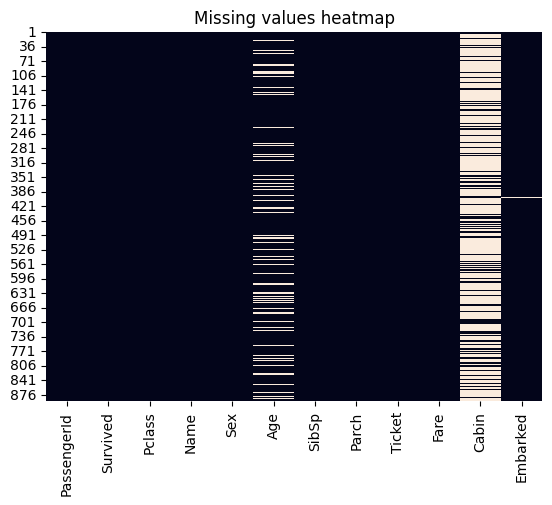

In [23]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [24]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [25]:
df.Cabin = df.Cabin.fillna('NA')

In [49]:
def clean_age(df):
    mean = df["Age"].mean()
    std = df["Age"].std()
    min = mean - std
    max = mean + std

    return df["Age"].fillna(np.random.randint(min, max))


## Transformation

In [47]:
df["Age"] = df["Age"].astype(float)

In [53]:
df["Age"] = clean_age(df)

13.888107470996335 41.25929993641107


In [51]:
df.Age.unique()

array([28.  , 25.  , 20.  , 29.  , 31.  , 37.  , 19.  ,  1.  , 20.5 ,
       42.  , 24.  , 48.  , 17.  , 27.  , 32.  , 38.  , 45.  , 30.5 ,
       41.  , 60.  , 50.  , 30.  , 40.  , 34.  , 36.  ,  3.  , 16.  ,
        7.  , 23.  , 44.  , 70.5 , 22.  , 26.  , 35.  ,  0.67, 62.  ,
       43.  , 18.  , 33.  ,  2.  , 39.  , 55.  , 56.  , 59.  , 58.  ,
       65.  ,  9.  , 51.  , 54.  , 28.5 , 14.  , 13.  , 21.  , 46.  ,
        4.  , 49.  , 47.  , 74.  , 11.  , 36.5 ,  6.  , 55.5 , 14.5 ,
        5.  , 32.5 , 15.  ,  8.  , 57.  , 10.  , 40.5 , 34.5 ,  0.75,
       64.  , 63.  , 61.  , 80.  , 24.5 , 66.  ,  0.83, 71.  , 45.5 ,
       52.  , 70.  ,  0.92, 53.  ,  0.42, 12.  , 23.5 ])

In [52]:
df.head(22)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0,NA,S
2,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
3,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542000000000005,NA,S
4,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NA,S
5,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0,B71,S
6,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.925,NA,S
7,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5,NA,S
8,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NA,C
9,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.25,NA,S
10,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0,NA,S


# #from categorical to numérical

In [65]:
le = LabelEncoder()
df.Survived= le.fit_transform(df.Survived.values)
df.Sex= le.fit_transform(df.Sex.values)
df.Embarked = le.fit_transform(df.Embarked.values)
df.Cabin = le.fit_transform(df.Cabin.values)

In [60]:
df.Pclass = df['Pclass'].astype(int)
df.Fare = df['Fare'].astype(float)
df.Age = df['Age'].astype(float)
df.Cabin = df['Cabin'].astype(int)
df.SibSp = df['SibSp'].astype(int)
df.Parch = df['Parch'].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(2), int32(4), int64(4), object(3)
memory usage: 83.5+ KB


In [54]:
def create_categorical_title(df):
    def find_title(name: str) -> str:
        search = re.search(
            " ([A-Za-z]+)\.", name
        )  # Search for a word with a point at the end
        if search:
            title = search.group(1)
            if title in ["Capt", "Col","Major", "Dr","Rev"]:
                return "Officer"
            elif title in ["Jonkheer", "Don","Sir","Lady","the Countess","Dona"]:
                return "Royalty"
            elif title in ["Mme","Mlle","Miss"]:
                return "Miss"
            elif title in ["Ms","Mr","Mrs"]:
                return "Mrs"
            elif title == "Master":
                return "Master"
            else:
                return "Rare"
        return ""

    return_title = df["Name"].apply(find_title)
    dict_title = {"Officer": 1, "Royalty": 2, "Miss": 3, "Mrs": 4, "Master":5, "Rare":6 }
    return return_title.replace(dict_title)


df["Title"] = create_categorical_title(df)

In [72]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,146,2,4
2,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,140,2,4
3,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,146,2,4
4,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,146,2,4
5,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,38,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,146,0,4
888,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,146,0,4
889,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,146,2,3
890,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,19.0,0,0,349215,7.8958,146,2,4
